# Часть 1: Классификация грибов

Метрики для грибов:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC-AUC: 1.0000


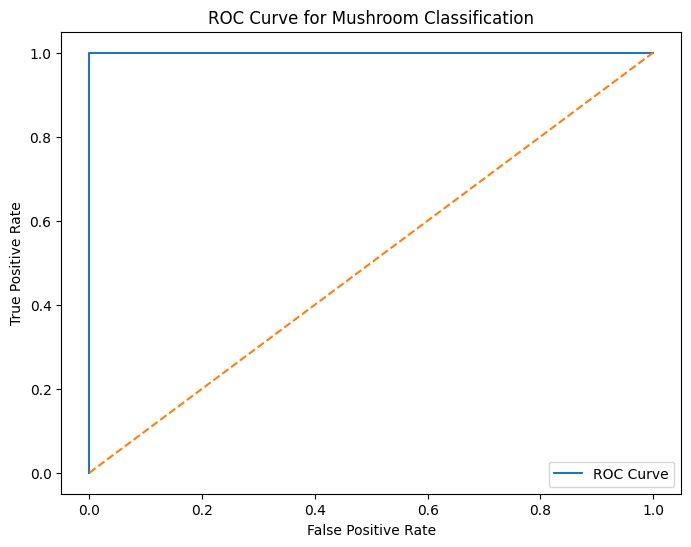

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, 
                            recall_score, roc_auc_score, roc_curve)
from sklearn.preprocessing import LabelEncoder

# Загрузка и подготовка данных
with open('mushrooms.txt', 'r', encoding='cp1251') as file:
    content = file.read()
df = pd.read_csv(pd.io.common.StringIO(content), sep="\t")

df['Класс'] = df['Класс'].map({'съедобный': 0, 'ядовитый': 1})

# Преобразование категориальных признаков
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Разделение данных
X = df.drop('Класс', axis=1)
y = df['Класс']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model = RandomForestClassifier(n_estimators=1, random_state=42)
model.fit(X_train, y_train)

# Предсказания и оценка
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Метрики для грибов:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Mushroom Classification')
plt.legend()
plt.show()

Метрики для политических предпочтений:
Accuracy: 0.9771
Precision: 0.9574
Recall: 0.9783
ROC-AUC: 0.9960


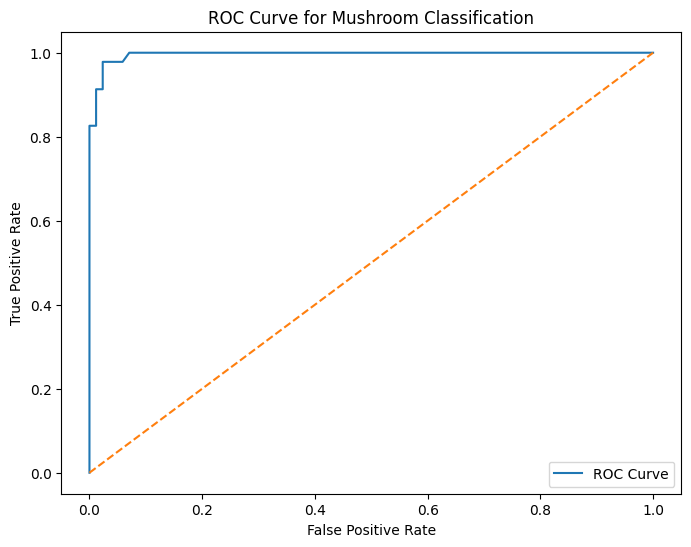

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, 
 recall_score, roc_auc_score, roc_curve)
from sklearn.preprocessing import LabelEncoder

# Загрузка и подготовка данных
with open('congress.txt', 'r', encoding='cp1251') as file:
   content = file.read()
df_congress = pd.read_csv(pd.io.common.StringIO(content), sep="\t")


df_congress['Класс'] = df_congress['Класс'].map({'демократ': 0, 'республиканец': 1})

# Преобразование категориальных признаков
le = LabelEncoder()
for col in df_congress.columns:
   df_congress[col] = le.fit_transform(df_congress[col])

# Разделение данных
X = df_congress.drop('Класс', axis=1)
y = df_congress['Класс']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказания и оценка
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print("Метрики для политических предпочтений:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Mushroom Classification')
plt.legend()
plt.show()